# Prepare Data

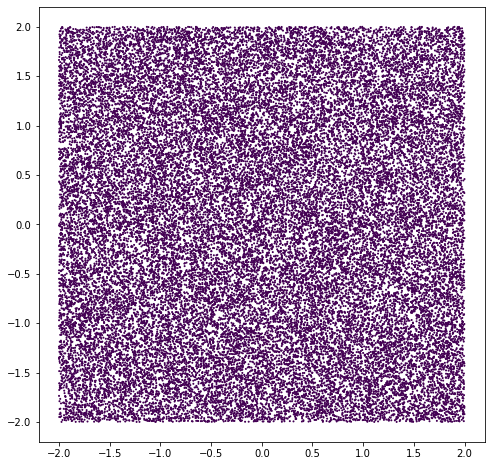

In [1]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

N=40000
L=4
X = L*np.random.rand(N,2) 
X[:,0] = X[:,0]-L/2
X[:,1] = X[:,1]-L/2

Y = np.zeros(N)

for i in range(N):
    if (X[i,0]-0.7)**2+(X[i,1]-0.6)**2<0.49:
        Y[i]=1
    else:
        Y[i]=1

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=1)
plt.show()

data = X
labels = to_categorical(Y)

In [ ]:
import os
import activation_plot as aplt

first_layer = [2,3,5]#10,20,30,90]
second_layer = [2,3,5]#10,20,30,90]

num_epoch = 100
X_test = aplt.data_grid(grid=200,square_len=2)
colors = aplt.get_color(X_test)

for i in range(len(first_layer)):
    for j in range(len(second_layer)):
        print('hid_layer: [%i , %i]'%(first_layer[i],second_layer[j]))
        print('progress :', int((i+j)/(len(first_layer)+len(second_layer))))
        hid_layer_units = [first_layer[i], second_layer[j]]
#     print('hid_layer: [%i]'%(first_layer[i]))
#     print('progress :', i/(len(first_layer)))
#     hid_layer_units = [first_layer[i]]
        model = aplt.prepare_model(hid_layer_units,n_category = len(labels[0]))

        net_name = '_'.join(str(e) for e in hid_layer_units)+'_2'
        model_name = 'model_'+net_name
        result_dir = 'iterasive_result/'+model_name
        if not os.path.exists(result_dir):
            os.makedirs(result_dir)
        model_data_labels = [model, data, labels]
        aplt.get_activation_prediction_transition(result_dir,num_epoch,X_test,model_data_labels)

hid_layer: [2 , 2]
progress : 0


W0830 14:11:28.836273 140362689181504 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


epoch 1: {'loss': [0.7802711129188538], 'categorical_accuracy': [0.0]}
epoch 2: {'loss': [0.7763861417770386], 'categorical_accuracy': [0.0]}
epoch 3: {'loss': [0.769956131776174], 'categorical_accuracy': [0.0]}
epoch 4: {'loss': [0.7610516250133514], 'categorical_accuracy': [0.0005625]}
epoch 5: {'loss': [0.7497690677642822], 'categorical_accuracy': [0.18418]}
epoch 6: {'loss': [0.7362355987230936], 'categorical_accuracy': [0.44860834]}
epoch 7: {'loss': [0.7205998471805027], 'categorical_accuracy': [0.5288357]}
epoch 8: {'loss': [0.7030186727643013], 'categorical_accuracy': [0.5876719]}
epoch 9: {'loss': [0.6838346719741821], 'categorical_accuracy': [0.6758139]}
epoch 10: {'loss': [0.6630756199359894], 'categorical_accuracy': [0.8474975]}
epoch 11: {'loss': [0.6406966989690607], 'categorical_accuracy': [0.9941546]}
epoch 12: {'loss': [0.6166816701491674], 'categorical_accuracy': [1.0]}
epoch 13: {'loss': [0.5909594480807965], 'categorical_accuracy': [1.0]}
epoch 14: {'loss': [0.56340

epoch 12: {'loss': [0.5543287346760432], 'categorical_accuracy': [1.0]}
epoch 13: {'loss': [0.5313763756018418], 'categorical_accuracy': [1.0]}


# visualize activation

## Single layer model

In [1]:
import activation_plot as aplt
import os
X_test = aplt.data_grid(grid=200,square_len=2)
colors = aplt.get_color(X_test)

if __name__ == '__main__':
    first_layer = [10,20,30,60,90,180]
    data_path_list = []
    for i in first_layer:
        path = 'iterasive_result/model_'+str(i)+'_2'
        if os.path.exists(path):
            data_path_list.append(path)
    for data_path in data_path_list:
        aplt.plot_data(data_path,X_test,colors)

Process iterasive_result/model_10_2
Process iterasive_result/model_20_2
Process iterasive_result/model_30_2
Process iterasive_result/model_60_2
Process iterasive_result/model_90_2
Process iterasive_result/model_180_2


## multi layer model

In [4]:
import activation_plot as aplt
import os
X_test = aplt.data_grid(grid=200,square_len=2)
colors = aplt.get_color(X_test)

first_layer = [2,3,5]
second_layer = [2,3,5]
if __name__ == '__main__':
    data_path_list = []
    for i in first_layer:
        for j in second_layer:
            path = 'iterasive_result/model_'+str(i)+'_'+str(j)+'_2'
            if os.path.exists(path):
                data_path_list.append(path)
    progress = 0
    for data_path in data_path_list:
        print('progress :{0}%'.format(int(progress*100/len(data_path_list))))
        progress += 1
        aplt.plot_data(data_path,X_test,colors)

progress :0%
Process iterasive_result/model_2_2_2
progress :11%:99%
Process iterasive_result/model_2_3_2
progress :22%:99%
Process iterasive_result/model_2_5_2
progress :33%:99%
Process iterasive_result/model_3_2_2
progress :44%:99%
Process iterasive_result/model_3_3_2
progress :55%:99%
Process iterasive_result/model_3_5_2
progress :66%:99%
Process iterasive_result/model_5_2_2
progress :77%:99%
Process iterasive_result/model_5_3_2
progress :88%:99%
Process iterasive_result/model_5_5_2
